<a href="https://colab.research.google.com/github/zernabhussain/network-anomaly-detection-ANN/blob/main/ANNAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt     
from tensorflow.keras.models import Sequential ,Model
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import Input, Dropout, Dense, Activation, BatchNormalization 
from sklearn.preprocessing import  MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split 
encoder = OneHotEncoder() 
min_max_scaler = MinMaxScaler()

In [ ]:
def plotHistory(history):
    print("Max. Validation Accuracy",max(history.history["val_accuracy"])) 
    print('='*20)
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()

In [ ]:
# This code will only require first time with raw data to normalize it.

outcome_mapping = {'normal.': 0, 'ipsweep.': 1,  'satan.': 2, 'smurf.': 3, 'pod.': 4, 'portsweep.': 5, 'buffer_overflow.':6, 'guess_passwd.': 7, 'warezclient.': 8, 'neptune.': 9, 'back.': 10, 'nmap.': 11,  'teardrop.': 12}
outcome_index_mapping = {} 
arr = []     
for  attr, v in outcome_mapping.items():
   print(attr, v)
   outcome_index_mapping[v] = attr
   arr.append(attr)

print(arr)

def NormalizeData(data,min,max):
    return (data - min) / (max- min)

def text_to_numbers(df): 
    # outcome_mapping = {'normal.': 0, 'imap.': 1, 'ipsweep.': 2, 'spy.': 3, 'loadmodule.': 4, 'multihop.': 5, 'warezmaster.': 6, 'land.': 7, 'rootkit.': 8, 'satan.': 9, 'smurf.': 10, 'pod.': 11, 'perl.': 12, 'ftp_write.': 13, 'portsweep.': 14, 'buffer_overflow.': 15, 'guess_passwd.': 16, 'warezclient.': 17, 'neptune.': 18, 'back.': 19, 'nmap.': 20, 'phf.': 21, 'teardrop.': 22}
    outcome_mapping = {'normal.': 0, 'ipsweep.': 1,  'satan.': 2, 'smurf.': 3, 'pod.': 4, 'portsweep.': 5, 'buffer_overflow.':6, 'guess_passwd.': 7, 'warezclient.': 8, 'neptune.': 9, 'back.': 10, 'nmap.': 11,  'teardrop.': 12}
    service_mapping = {'login': 0, 'remote_job': 1, 'ecr_i': 2, 'echo': 3, 'time': 4, 'systat': 5, 'http': 6, 'courier': 7, 'domain': 8, 'imap4': 9, 'other': 10, 'ftp_data': 11, 'uucp': 12, 'pop_3': 13, 'klogin': 14, 'nnsp': 15, 'netbios_ns': 16, 'eco_i': 17, 'link': 18, 'name': 19, 'urp_i': 20, 'private': 21, 'printer': 22, 'urh_i': 23, 'mtp': 24, 'netbios_dgm': 25, 'hostnames': 26, 'uucp_path': 27, 'csnet_ns': 28, 'supdup': 29, 'http_443': 30, 'IRC': 31, 'daytime': 32, 'discard': 33, 'pm_dump': 34, 'efs': 35, 'finger': 36, 'auth': 37, 'domain_u': 38, 'ntp_u': 39, 'X11': 40, 'tftp_u': 41, 'ldap': 42, 'netstat': 43, 'gopher': 44, 'vmnet': 45, 'red_i': 46, 'Z39_50': 47, 'smtp': 48, 'pop_2': 49, 'ssh': 50, 'iso_tsap': 51, 'bgp': 52, 'ctf': 53, 'whois': 54, 'ftp': 55, 'exec': 56, 'telnet': 57, 'sunrpc': 58, 'rje': 59, 'nntp': 60, 'tim_i': 61, 'shell': 62, 'kshell': 63, 'sql_net': 64, 'netbios_ssn': 65}
    flag_mapping = {'SH': 0, 'S3': 1, 'S0': 2, 'RSTO': 3, 'RSTR': 4, 'S1': 5, 'S2': 6, 'RSTOS0': 7, 'REJ': 8, 'SF': 9, 'OTH': 10}
    protocol_type = {'icmp': 0 ,'tcp': 1 ,'udp': 2}
    values = df.values   
    
    for idx in range(len(values)):
         outcome= df.loc[idx, 'outcome']
         service= df.loc[idx, 'service']
         flag= df.loc[idx, 'flag'] 
         p_type= df.loc[idx, 'protocol_type'] 
         outcome_res = outcome_mapping.get(outcome,13) 
         df.loc[idx, 'outcome'] = NormalizeData(outcome_res,0,13) 
         df.loc[idx, 'service'] = NormalizeData(service_mapping[service],0,65)  
         df.loc[idx, 'flag'] =  NormalizeData(flag_mapping[flag] ,0,10) 
         df.loc[idx, 'protocol_type'] =  NormalizeData(protocol_type[p_type] ,0,2) 
    df.to_csv("kdd99_norm_data.csv", index=False) 
        

normal. 0
ipsweep. 1
satan. 2
smurf. 3
pod. 4
portsweep. 5
buffer_overflow. 6
guess_passwd. 7
warezclient. 8
neptune. 9
back. 10
nmap. 11
teardrop. 12
['normal.', 'ipsweep.', 'satan.', 'smurf.', 'pod.', 'portsweep.', 'buffer_overflow.', 'guess_passwd.', 'warezclient.', 'neptune.', 'back.', 'nmap.', 'teardrop.']


In [ ]:
try:
    norm_data_url= "https://docs.google.com/spreadsheets/d/e/2PACX-1vQviuZcQnrBglwqYjmiW8HnKF5SEHxU47oFxQpuzFrLDfbs84_qHlghLl4fyK0DBLtNMcJPCrXnXwq1/pub?gid=945341573&single=true&output=csv" 
    df = pd.read_csv(norm_data_url, sep=',')   
    print("Totel Number of rows: ",len(df))  
    print('Totel number of columns: ', df.shape[1])  
    print('The different type of mood labels:') 
except:
    print('Error downloading')
    raise

Totel Number of rows:  145586
Totel number of columns:  38
The different type of mood labels:


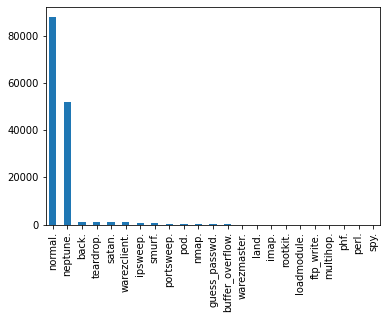

In [ ]:
df.outcome.value_counts().plot(kind='bar') 

In [ ]:
# text_to_numbers(df) 

In [ ]:
y = df.outcome.values
y = encoder.fit_transform(np.array(y).reshape(-1,1)).toarray() 
 
main_columns = df.columns.drop(['outcome'])
x = df[main_columns].values

In [ ]:
X = np.asarray(x).astype(np.float32)
Y = np.asarray(y).astype(np.float32)

In [ ]:
def prepare_datasets(x,y,test_size, validation_size):  
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)
    x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=validation_size)  
    return x_train, x_validation, x_test, y_train, y_validation, y_test

 
x_train, x_validation, x_test, y_train, y_validation, y_test  = prepare_datasets(X,Y, 0.15, 0.15)
x_train.shape, x_validation.shape, x_test.shape, y_train.shape, y_validation.shape, y_test.shape

((105185, 37),
 (18563, 37),
 (21838, 37),
 (105185, 14),
 (18563, 14),
 (21838, 14))

In [ ]:
def build_ANN_model(): 
    model = Sequential()
    model.add(Dense(37, input_dim=X.shape[1],  kernel_initializer='normal',activation='relu')) 
    model.add(Dense(10, input_dim=X.shape[1],kernel_initializer='normal', activation='tanh')) 
    model.add(Dense(37, input_dim=X.shape[1], kernel_initializer='normal',activation='sigmoid'))  
    model.add(Dense(Y.shape[1],activation='softmax')) 
    model.compile(optimizer='Adam',
              # loss="MSE",
              loss='categorical_crossentropy',
              metrics=["accuracy"])  
    model.summary()
    return model   

In [ ]:
modelANN = build_ANN_model()
historyANN = modelANN.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=500, batch_size=100) 

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_67 (Dense)            (None, 37)                1406      
                                                                 
 dense_68 (Dense)            (None, 10)                380       
                                                                 
 dense_69 (Dense)            (None, 37)                407       
                                                                 
 dense_70 (Dense)            (None, 14)                532       
                                                                 
Total params: 2,725
Trainable params: 2,725
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
1052/1052 [==============================] - 3s 2ms/step - loss: 0.3067 - accuracy: 0.9333 - val_loss: 0.1669 - val_accuracy: 0.9636
Epoch 2/500
1052/1052 [===============

273/273 [==============================] - 0s 1ms/step - loss: 0.0321 - accuracy: 0.9918
ANN Evaluation score:  [0.03206464275717735, 0.9918032884597778]
Max. Validation Accuracy 0.994413435459137


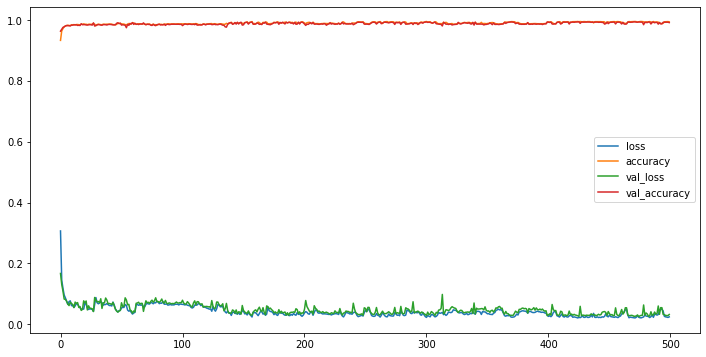

In [ ]:
escoreANN = modelANN.evaluate(x_test, y_test, batch_size=80)
predANN = modelANN.predict(x_test)
predANN = np.argmax(predANN,axis=1) 
  
print("ANN Evaluation score:  {}".format(escoreANN)) 
print('='*50)  
plotHistory(historyANN) 

In [ ]:
def predict(model,test,expected): 
  pred = model.predict(np.array([test])) 
  pred = np.argmax(pred)
  expected = np.argmax(expected)
  print("prediction is {0} and expected is {1}.".format(pred, expected))
  

In [ ]:
predict(modelANN,x_test[1],y_test[1])
predict(modelANN,x_test[2],y_test[2])
predict(modelANN,x_test[3],y_test[3])
predict(modelANN,x_test[4],y_test[4])

prediction is 0 and expected is 0.
prediction is 9 and expected is 9.
prediction is 9 and expected is 9.
prediction is 12 and expected is 12.
